In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Space Mission Data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


In [3]:
print(df.columns)


print(df.shape)

rows,columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')
(4313, 9)
The dataset contains 4313 rows and 9 columns.


In [4]:
df = df.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], axis=1)

df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4313 entries, 0 to 4312
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4313 non-null   object
 1   Location        4313 non-null   object
 2   Datum           4313 non-null   object
 3   Detail          4313 non-null   object
 4   Status Rocket   4313 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4313 non-null   object
dtypes: object(7)
memory usage: 236.0+ KB


In [6]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4313,4313,4313,4313,4313,964,4313
unique,55,136,4308,4267,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450,Success
freq,1777,235,2,6,3528,136,3870


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

df = df.dropna()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3349
Status Mission       0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4009
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    964 non-null    object
 1   Location        964 non-null    object
 2   Datum           964 non-null    object
 3   Detail          964 non-null    object
 4   Status Rocket   964 non-null    object
 5    Rocket         964 non-null    object
 6   Status Mission  964 non-null    object
dtypes: object(7)
memory usage: 60.2+ KB


In [9]:
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 1


In [10]:
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 4009
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    963 non-null    object
 1   Location        963 non-null    object
 2   Datum           963 non-null    object
 3   Detail          963 non-null    object
 4   Status Rocket   963 non-null    object
 5    Rocket         963 non-null    object
 6   Status Mission  963 non-null    object
dtypes: object(7)
memory usage: 60.2+ KB


In [11]:
ds = df["Company Name"].value_counts().reset_index()
ds

,Company Name,count
0,CASC,157
1,NASA,149
2,SpaceX,99
3,ULA,98
4,Arianespace,96
5,Northrop,83
6,ISRO,67
7,MHI,37
8,VKS RF,33
9,US Air Force,26


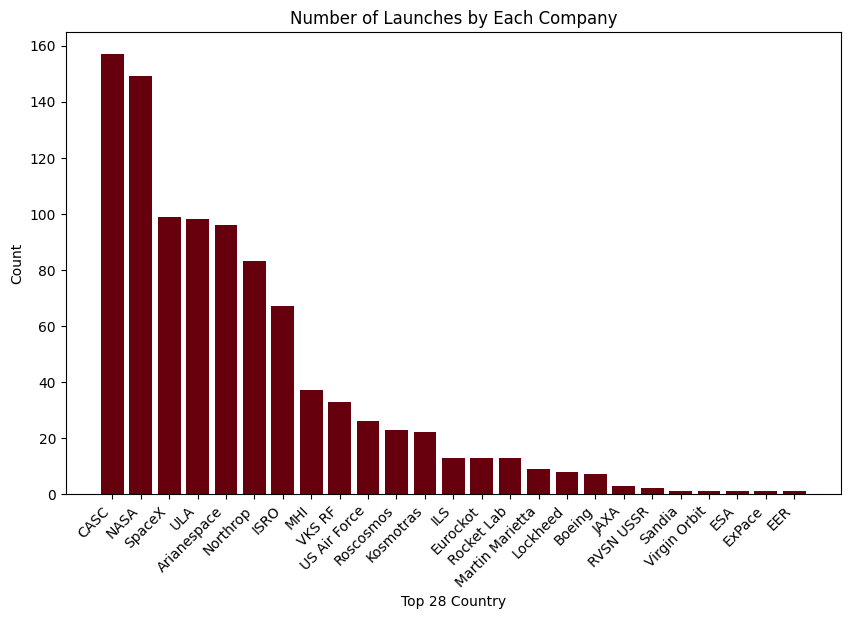

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(ds[ds.columns[0]], ds[ds.columns[1]], color=plt.cm.Reds(ds[ds.columns[1]] / 1))

plt.title("Number of Launches by Each Company")
plt.xlabel("Top 28 Country")
plt.ylabel("Count")

plt.xticks(rotation=45, ha="right")

plt.show()


In [13]:
ds = df["Status Rocket"].value_counts().reset_index()
ds

,Status Rocket,count
0,StatusActive,585
1,StatusRetired,378


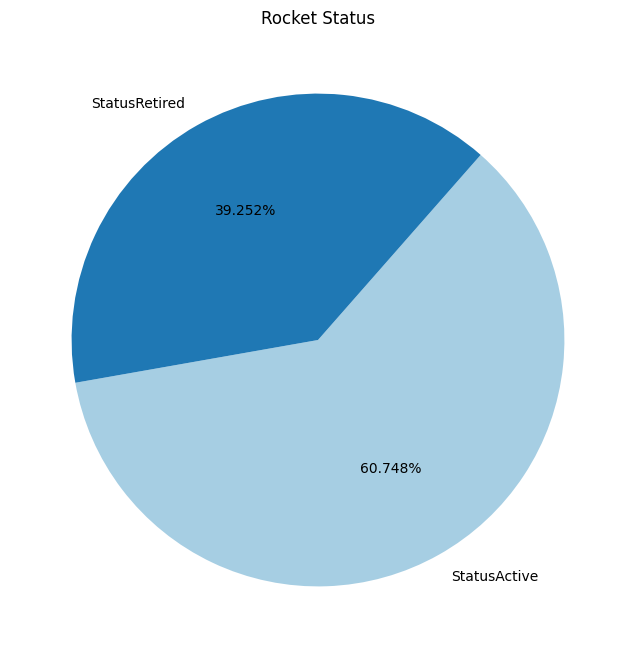

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 8))
plt.pie(ds[ds.columns[1]], labels=ds[ds.columns[0]], autopct='%1.3f%%', startangle=190, colors=plt.cm.Paired.colors)
plt.title("Rocket Status")
plt.show()


In [15]:
ds = df["Status Mission"].value_counts().reset_index()
ds

,Status Mission,count
0,Success,909
1,Failure,36
2,Partial Failure,17
3,Prelaunch Failure,1


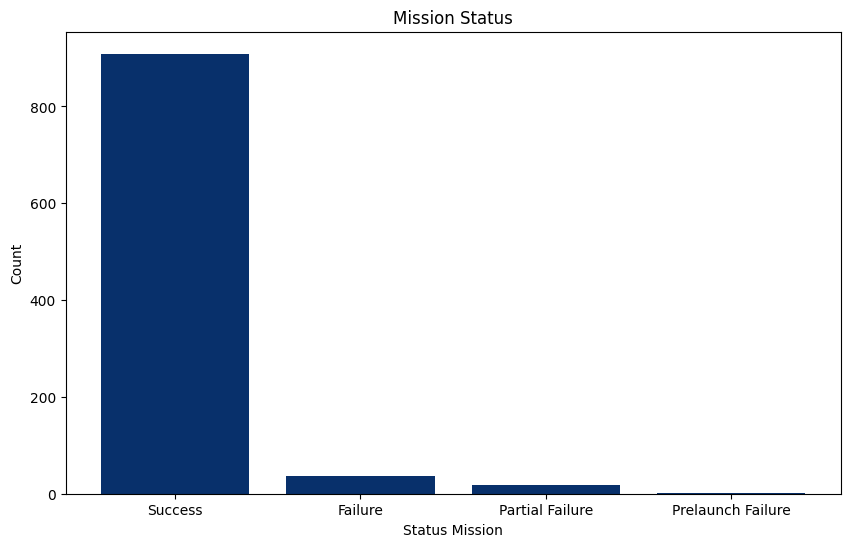

In [16]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(ds[ds.columns[0]], ds[ds.columns[1]], color=plt.cm.Blues(ds[ds.columns[1]] / 1))

plt.title("Mission Status")
plt.xlabel("Status Mission")
plt.ylabel("Count")


plt.show()


In [17]:
df2 = df

In [18]:
df2.loc[:," Rocket"]

#dtype = object so we need to convert them to float

,Rocket
0,50
1,29.75
3,65
4,145
5,64.68
...,...
3844,59
3960,63.23
3982,63.23
3989,63.23


In [19]:
# Remove commas and convert the column to floats
df2[' Rocket'] = df2[' Rocket'].replace(',', '', regex=True).astype(float)

# Fill NaN values with 0.0 if necessary
df2[' Rocket'] = df2[' Rocket'].fillna(0.0)

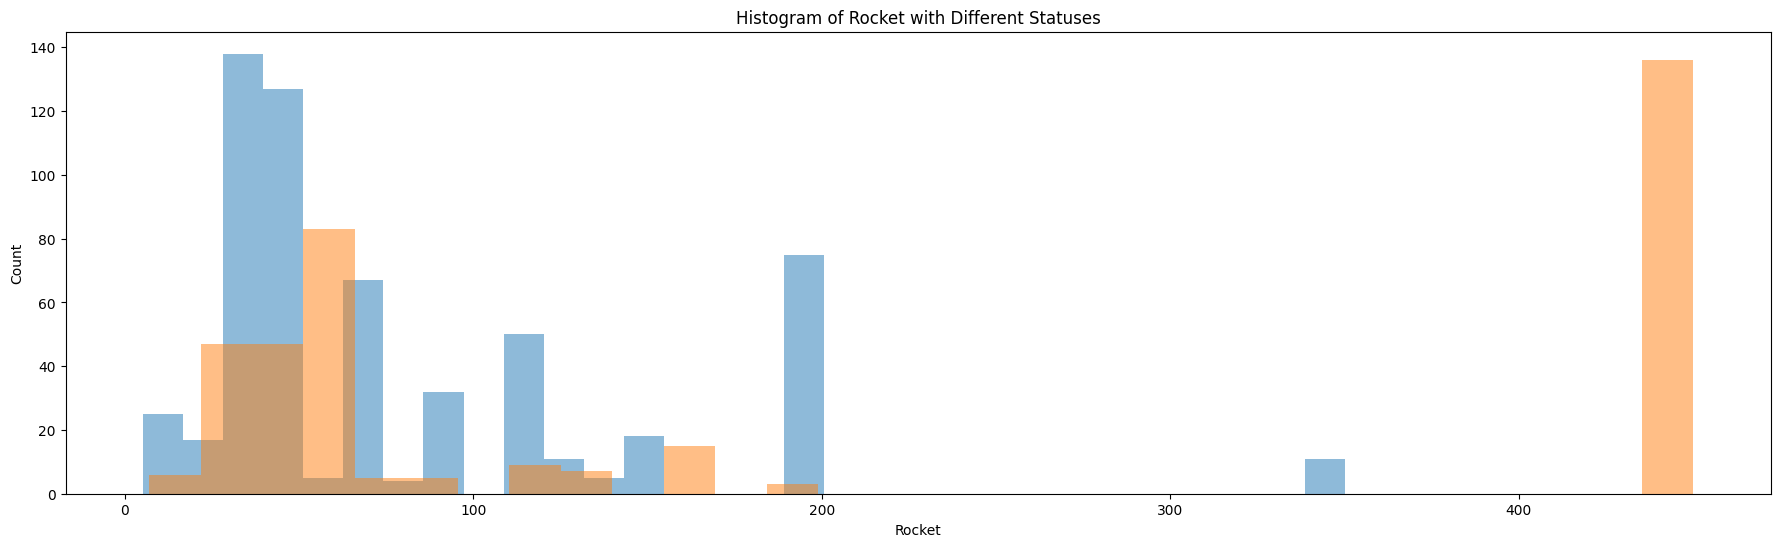

In [20]:
import matplotlib.pyplot as plt

df_d = df2[df2[" Rocket"] < 1000]

plt.figure(figsize=(22, 6))

statuses = df_d["Status Rocket"].unique()

# Plot each status as a separate histogram
for status in statuses:
    subset = df_d[df_d["Status Rocket"] == status]
    plt.hist(subset[" Rocket"], bins=30, alpha=0.5, label=status)

plt.xlabel("Rocket")
plt.ylabel("Count")
plt.title("Histogram of Rocket with Different Statuses")


plt.show()


In [21]:
df2.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [22]:
df_money = df2.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money

,Company Name,Rocket
0,Arianespace,16345.00
1,Boeing,1241.00
2,CASC,6310.51
3,EER,20.00
4,ESA,37.00
5,Eurockot,543.40
6,ExPace,28.30
7,ILS,1320.00
8,ISRO,2177.00
9,JAXA,168.00


In [23]:
df_money = df_money.sort_values([" Rocket"], ascending = False)
df_money.head()

,Company Name,Rocket
14,NASA,76280.00
0,Arianespace,16345.00
21,ULA,14798.00
16,RVSN USSR,10000.00
2,CASC,6310.51


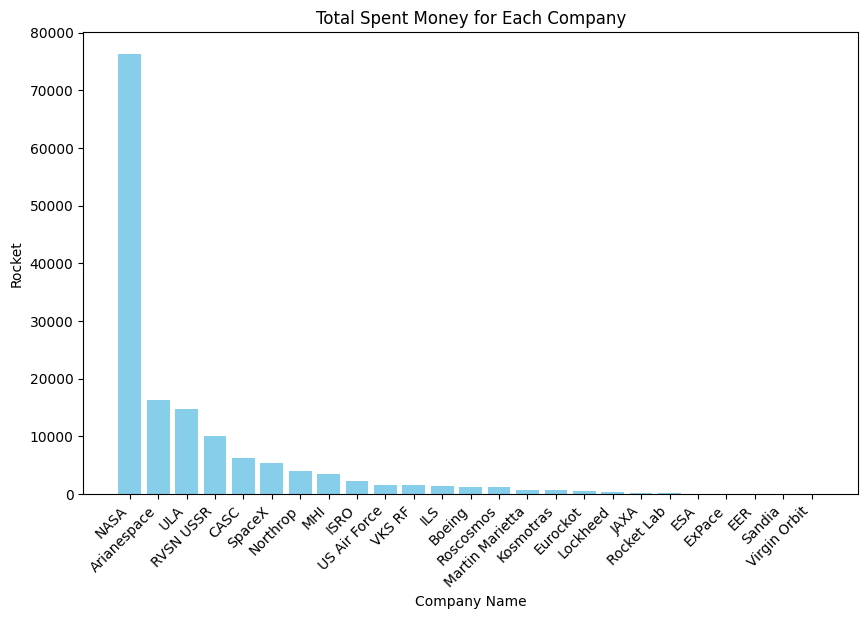

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(df_money["Company Name"], df_money[" Rocket"], color='skyblue')

plt.title("Total Spent Money for Each Company")
plt.xlabel("Company Name")
plt.ylabel("Rocket")

#  for better readability if needed
plt.xticks(rotation=45, ha="right")

# Display the chart
plt.show()

In [25]:
#converting data in "Datum" column to datetime data type
df["date"] = pd.to_datetime(df["Datum"], errors='coerce')
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020-07-25 03:13:00+00:00


In [26]:
#extracting "year" from date
df["year"] = df["date"].apply(lambda datetime: datetime.year)


In [27]:
#number of rockets launched by year
ds = df["year"].value_counts().reset_index()
ds

,year,count
0,2018.0,88
1,2019.0,73
2,2017.0,66
3,2016.0,64
4,2020.0,52
5,2014.0,41
6,2015.0,37
7,2013.0,33
8,2009.0,31
9,2011.0,29


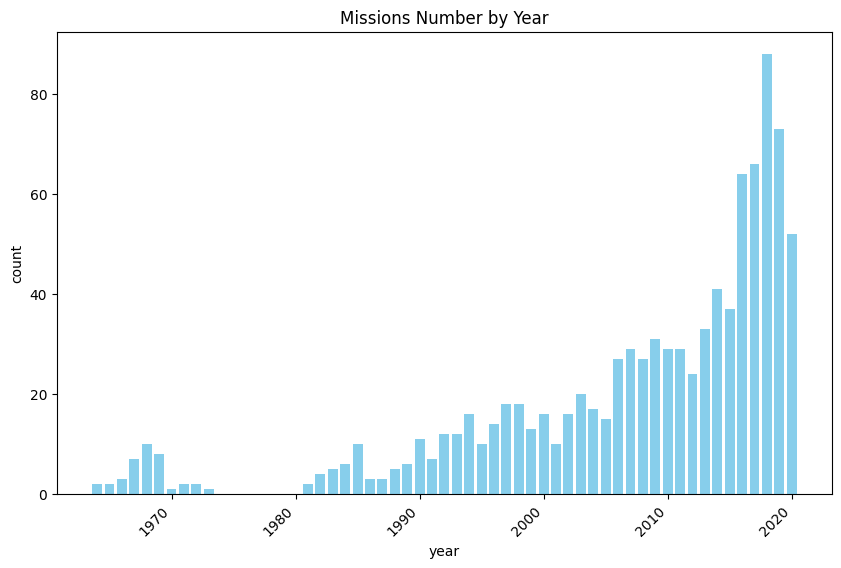

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(ds[ds.columns[0]], ds[ds.columns[1]], color='skyblue')

plt.title("Missions Number by Year")
plt.xlabel(ds.columns[0])
plt.ylabel(ds.columns[1])

plt.xticks(rotation=45, ha="right")

plt.show()


In [29]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load your data
# df = pd.read_csv('your_data_file.csv')  # Adjust filename as necessary

# Assuming 'Status Mission' has been encoded to binary
df['Status Mission'] = df['Status Mission'].apply(lambda x: 1 if x == 'Success' else 0)

# Prepare features with potential categorical variables needing encoding
features = df[['Company Name', ' Rocket', 'year']]
features = pd.get_dummies(features, dummy_na=False)  # One-hot encoding for categorical variables

# Handle NaN values in numeric columns if any
features[' Rocket'] = features[' Rocket'].fillna(features[' Rocket'].mean())  # Replace NaN with mean

# Drop any remaining NaN values from the features dataframe
features.dropna(inplace=True)

# Ensure the target vector aligns with the features
target = df['Status Mission'].loc[features.index]

# Use stratified splitting to maintain the same class proportion in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)

# Check for NaNs
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in y_train:", y_train.isnull().sum().sum())

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


NaNs in X_train: 0
NaNs in y_train: 0
Accuracy: 0.9479166666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.95      1.00      0.97       182

    accuracy                           0.95       192
   macro avg       0.47      0.50      0.49       192
weighted avg       0.90      0.95      0.92       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


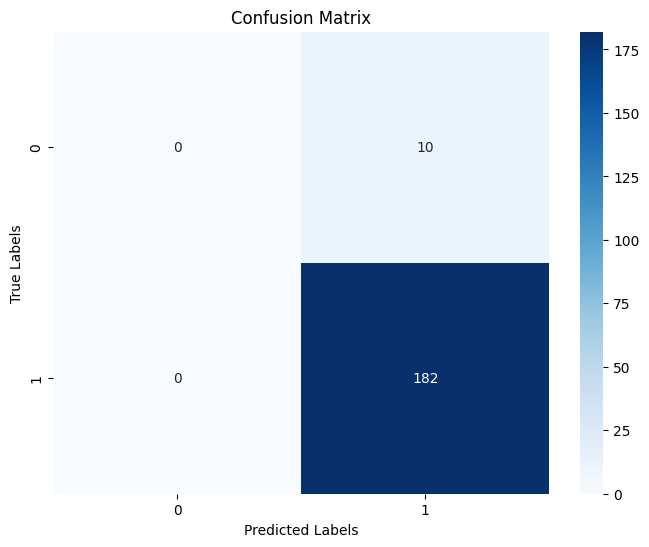

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For a nicer heatmap visual

# Assuming you already have y_test and y_pred from your model's predictions
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Target variable distribution after encoding:
Status Mission
1    706
0    294
Name: count, dtype: int64
NaNs in X_train: 0
NaNs in y_train: 0
Top 10 features based on consensus from multiple methods:
['Rocket', 'year', 'Company Name_NASA', 'Company Name_Roscosmos', 'Company Name_Blue Origin', 'Company Name_SpaceX']


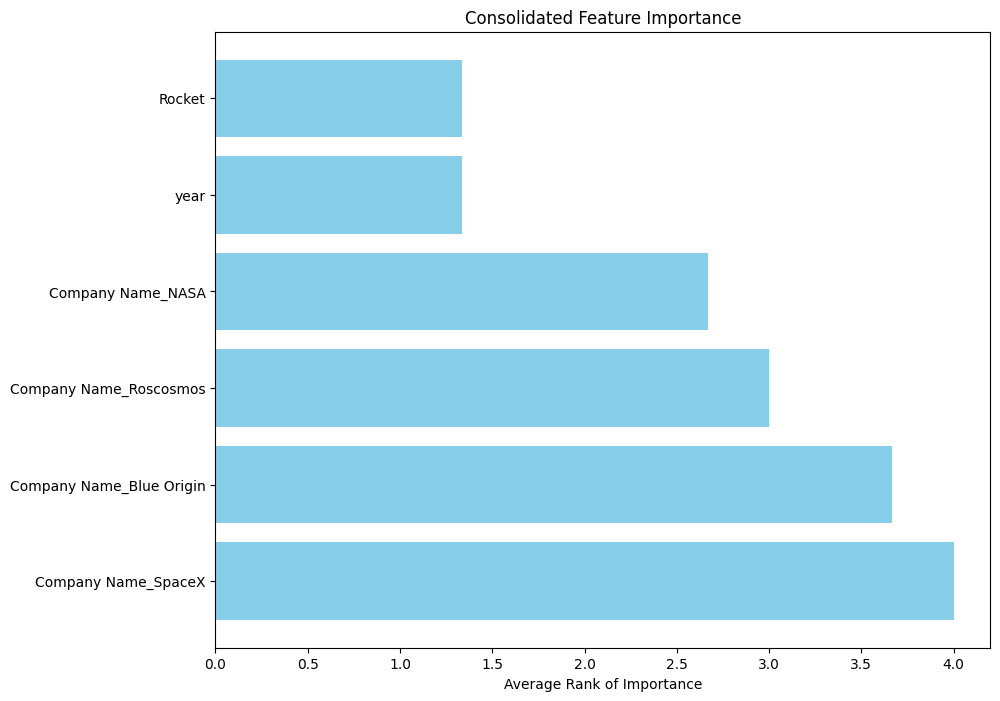

Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      1.00      0.83       141

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Generate dummy data
np.random.seed(42)

# Create a DataFrame with 1000 rows of dummy data
data = {
    'Company Name': np.random.choice(['SpaceX', 'NASA', 'Blue Origin', 'Roscosmos'], 1000),
    'Rocket': np.random.normal(loc=50, scale=10, size=1000),
    'year': np.random.choice([2018, 2019, 2020, 2021], 1000),
    'Status Mission': np.random.choice(['Success', 'Failure'], 1000, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

# Binary encoding for 'Status Mission'
df['Status Mission'] = df['Status Mission'].apply(lambda x: 1 if x == 'Success' else 0)

# Check the distribution after encoding
print("Target variable distribution after encoding:")
print(df['Status Mission'].value_counts())

# Ensure that we have both classes present
if df['Status Mission'].nunique() > 1:
    # Prepare features with potential categorical variables needing encoding
    features = df[['Company Name', 'Rocket', 'year']]
    features = pd.get_dummies(features, dummy_na=False)  # One-hot encoding for categorical variables

    # Handle NaN values in numeric columns by filling with the mean
    features['Rocket'] = features['Rocket'].fillna(features['Rocket'].mean())  # Replace NaN with mean

    # Fill any remaining NaN values in the features dataframe with the column mean
    features = features.fillna(features.mean())

    # Ensure the target vector aligns with the features
    target = df['Status Mission'].loc[features.index]

    # Use stratified splitting to maintain the same class proportion in training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)

    # Check for NaNs
    print("NaNs in X_train:", X_train.isnull().sum().sum())
    print("NaNs in y_train:", y_train.isnull().sum().sum())

    # Train RandomForest model for feature analysis
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)

    # Random Forest Feature Importance
    feature_importances_rf = rf.feature_importances_
    feature_names = X_train.columns

    # Permutation Importance
    perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
    perm_importances = perm_importance.importances_mean

    # Recursive Feature Elimination
    rfe = RFE(estimator=rf, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    rfe_ranks = rfe.ranking_

    # Combine all feature importance metrics into a DataFrame
    df_importances = pd.DataFrame({
        'Feature': feature_names,
        'RF_Importance': feature_importances_rf,
        'Perm_Importance': perm_importances,
        'RFE_Rank': rfe_ranks
    })

    # Calculate ranks for Random Forest and Permutation Importance
    df_importances['RF_Rank'] = df_importances['RF_Importance'].rank(ascending=False, method='min')
    df_importances['Perm_Rank'] = df_importances['Perm_Importance'].rank(ascending=False, method='min')

    # Calculate the average rank across all methods
    df_importances['Average_Rank'] = df_importances[['RF_Rank', 'Perm_Rank', 'RFE_Rank']].mean(axis=1)

    # Sort features by average rank
    df_importances_sorted = df_importances.sort_values('Average_Rank')

    # Select top 10 features based on average rank
    top_features = df_importances_sorted.head(10)['Feature'].tolist()

    print("Top 10 features based on consensus from multiple methods:")
    print(top_features)

    # Visualizing consolidated feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(top_features, df_importances_sorted.head(10)['Average_Rank'], color='skyblue')
    plt.xlabel('Average Rank of Importance')
    plt.title('Consolidated Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()

    # Proceed with model training using the top features
    X_train_top = X_train[top_features]
    X_test_top = X_test[top_features]

    # Initialize and train the logistic regression model using top features
    model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
    model.fit(X_train_top, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test_top)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
else:
    print("Error: The target variable 'Status Mission' has only one class.")


In [35]:
# Calculate ranks for Random Forest and Permutation Importance
df_importances['RF_Rank'] = df_importances['RF_Importance'].rank(ascending=False, method='min')
df_importances['Perm_Rank'] = df_importances['Perm_Importance'].rank(ascending=False, method='min')

# Calculate the average rank across all methods
df_importances['Average_Rank'] = df_importances[['RF_Rank', 'Perm_Rank', 'RFE_Rank']].mean(axis=1)

# Sort features by average rank
df_importances_sorted = df_importances.sort_values('Average_Rank')

# Drop the two least important features
least_important_features = df_importances_sorted.tail(2)['Feature'].tolist()
features_dropped = features.drop(columns=least_important_features)

print(f"Dropping the following least important features: {least_important_features}")

# Re-split the data with the reduced feature set
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(features_dropped, target, test_size=0.2, stratify=target, random_state=42)

# Re-train the model with the reduced feature set
model_dropped = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model_dropped.fit(X_train_dropped, y_train_dropped)

# Predict on the testing set with the reduced feature set
y_pred_dropped = model_dropped.predict(X_test_dropped)

# Evaluate the model with the reduced feature set
accuracy_dropped = accuracy_score(y_test_dropped, y_pred_dropped)
classification_rep_dropped = classification_report(y_test_dropped, y_pred_dropped)

print("Accuracy after dropping the least important features:", accuracy_dropped)
print("Classification Report after dropping the least important features:\n", classification_rep_dropped)

# Model training with all features for comparison
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train, y_train)

# Predict on the testing set with all features
y_pred_full = model_full.predict(X_test)

# Evaluate the model with all features
accuracy_full = accuracy_score(y_test, y_pred_full)
classification_rep_full = classification_report(y_test, y_pred_full)

print("Accuracy with all features:", accuracy_full)
print("Classification Report with all features:\n", classification_rep_full)

Dropping the following least important features: ['Company Name_Blue Origin', 'Company Name_SpaceX']
Accuracy after dropping the least important features: 0.705
Classification Report after dropping the least important features:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      1.00      0.83       141

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200

Accuracy with all features: 0.705
Classification Report with all features:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      1.00      0.83       141

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif